# Doc auxiliar para tratar dados do IBGE de 2000, 2010 e 2022

Fonte: [IBGE - Censo Demográfico](https://sidra.ibge.gov.br/pesquisa/censo-demografico/demografico-2022/universo-populacao-por-cor-ou-raca)

Importando bibliotecas que serão usadas no projeto

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Lendo planilhas

In [2]:
df_pop_2000_2010 = pd.read_excel('Tabela 1552 pop_2000_2010.xlsx', sheet_name='Tabela', header=None, skiprows=8, usecols=[0, 1, 2], skipfooter=1)
df_pop_2000_2010.columns = ['localidade', 'populacao_res_2000', 'populacao_res_2010']
df_pop_2000_2010

,localidade,populacao_res_2000,populacao_res_2010
0,Porto Velho,334661,428527
1,Rio Branco,253059,336038
2,Manaus,1405835,1802014
3,Boa Vista,200568,284313
4,Belém,1280614,1393399
5,Macapá,283308,398204
6,Palmas,137355,228332
7,São Luís,870028,1014837
8,Teresina,715360,814230
9,Fortaleza,2141402,2452185


In [3]:
df_pop_2022 = pd.read_excel('Tabela 4714.xlsx', sheet_name='População residente; 2022', header=None, skiprows=5, usecols=[0, 1], skipfooter=1)
df_pop_2022.columns = ['localidade', 'populacao_res_2022']
df_pop_2022

,localidade,populacao_res_2022
0,Porto Velho (RO),460434
1,Rio Branco (AC),364756
2,Manaus (AM),2063689
3,Boa Vista (RR),413486
4,Belém (PA),1303403
5,Macapá (AP),442933
6,Palmas (TO),302692
7,São Luís (MA),1037775
8,Teresina (PI),866300
9,Fortaleza (CE),2428708


Tirando a UF da coluna

In [4]:
df_pop_2022['localidade'] = df_pop_2022['localidade'].str[:-4]
df_pop_2022.head()

,localidade,populacao_res_2022
0,Porto Velho,460434
1,Rio Branco,364756
2,Manaus,2063689
3,Boa Vista,413486
4,Belém,1303403


In [5]:
df_area = pd.read_excel('Tabela 4714.xlsx', sheet_name='Área da unidade territ...; 2022', header=None, skiprows=5, usecols=[0, 1], skipfooter=1)
df_area.columns = ['localidade', 'area_km2']
df_area

,localidade,area_km2
0,Porto Velho (RO),34090.952
1,Rio Branco (AC),8835.154
2,Manaus (AM),11401.092
3,Boa Vista (RR),5687.037
4,Belém (PA),1059.466
5,Macapá (AP),6563.849
6,Palmas (TO),2227.329
7,São Luís (MA),583.063
8,Teresina (PI),1391.293
9,Fortaleza (CE),312.353


Tirando a UF da coluna

In [6]:
df_area['localidade'] = df_area['localidade'].str[:-4]
df_area.head()

,localidade,area_km2
0,Porto Velho,34090.952
1,Rio Branco,8835.154
2,Manaus,11401.092
3,Boa Vista,5687.037
4,Belém,1059.466


Juntando os DataFrames pela coluna de localidade

In [7]:
# Tirando espaços da coluna localidade para ficarem padrões
df_pop_2022['localidade'] = df_pop_2022['localidade'].str.strip()
df_area['localidade'] = df_area['localidade'].str.strip()
df_pop_2000_2010['localidade'] = df_pop_2000_2010['localidade'].str.strip()

df = pd.merge(df_area, df_pop_2000_2010, on='localidade').merge(df_pop_2022, on='localidade')
df

,localidade,area_km2,populacao_res_2000,populacao_res_2010,populacao_res_2022
0,Porto Velho,34090.952,334661,428527,460434
1,Rio Branco,8835.154,253059,336038,364756
2,Manaus,11401.092,1405835,1802014,2063689
3,Boa Vista,5687.037,200568,284313,413486
4,Belém,1059.466,1280614,1393399,1303403
5,Macapá,6563.849,283308,398204,442933
6,Palmas,2227.329,137355,228332,302692
7,São Luís,583.063,870028,1014837,1037775
8,Teresina,1391.293,715360,814230,866300
9,Fortaleza,312.353,2141402,2452185,2428708


Criando colunas para densidade demografia para km²

In [8]:
df['densidade_2000'] = (df['populacao_res_2000'] / df['area_km2']).round(1)
df['densidade_2010'] = (df['populacao_res_2010'] / df['area_km2']).round(1)
df['densidade_2022'] = (df['populacao_res_2022'] / df['area_km2']).round(1)

df.head()

,localidade,area_km2,populacao_res_2000,populacao_res_2010,populacao_res_2022,densidade_2000,densidade_2010,densidade_2022
0,Porto Velho,34090.952,334661,428527,460434,9.8,12.6,13.5
1,Rio Branco,8835.154,253059,336038,364756,28.6,38.0,41.3
2,Manaus,11401.092,1405835,1802014,2063689,123.3,158.1,181.0
3,Boa Vista,5687.037,200568,284313,413486,35.3,50.0,72.7
4,Belém,1059.466,1280614,1393399,1303403,1208.7,1315.2,1230.2


Verificando tipos e linhas faltantes no DataFrame

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   localidade          27 non-null     object 
 1   area_km2            27 non-null     float64
 2   populacao_res_2000  27 non-null     int64  
 3   populacao_res_2010  27 non-null     int64  
 4   populacao_res_2022  27 non-null     int64  
 5   densidade_2000      27 non-null     float64
 6   densidade_2010      27 non-null     float64
 7   densidade_2022      27 non-null     float64
dtypes: float64(4), int64(3), object(1)
memory usage: 1.9+ KB


### Análise Exploratória

In [10]:
df.describe()

,area_km2,populacao_res_2000,populacao_res_2010,populacao_res_2022,densidade_2000,densidade_2010,densidade_2022
count,27.000000,2.700000e+01,2.700000e+01,2.700000e+01,27.000000,27.000000,27.000000
mean,3621.794111,1.498595e+06,1.683928e+06,1.721697e+06,2298.392593,2561.896296,2561.492593
std,6859.549221,2.127715e+06,2.283769e+06,2.292920e+06,2379.337372,2596.445037,2551.593140
min,97.123000,1.373550e+05,2.283320e+05,3.026920e+05,9.800000,12.600000,13.500000
25%,383.123000,4.019245e+05,4.898125e+05,5.699840e+05,117.500000,142.700000,165.700000
50%,729.296000,7.977590e+05,9.327480e+05,9.579160e+05,1498.700000,1785.300000,1880.800000
75%,5007.242500,1.505110e+06,1.776960e+06,1.918704e+06,3586.550000,3943.450000,4024.400000
max,34090.952000,1.043425e+07,1.125350e+07,1.145200e+07,6859.200000,7850.700000,7775.500000


Top 4 maiores populações em 2022

In [11]:
df.nlargest(4, 'populacao_res_2022')

,localidade,area_km2,populacao_res_2000,populacao_res_2010,populacao_res_2022,densidade_2000,densidade_2010,densidade_2022
19,São Paulo,1521.202,10434252,11253503,11451999,6859.2,7397.8,7528.3
18,Rio de Janeiro,1200.329,5857904,6320446,6211223,4880.2,5265.6,5174.6
26,Brasília,5760.784,2051146,2570160,2817381,356.1,446.1,489.1
9,Fortaleza,312.353,2141402,2452185,2428708,6855.7,7850.7,7775.5


Gráfico de barras empilhadas para verificar população em decorrer do tempo

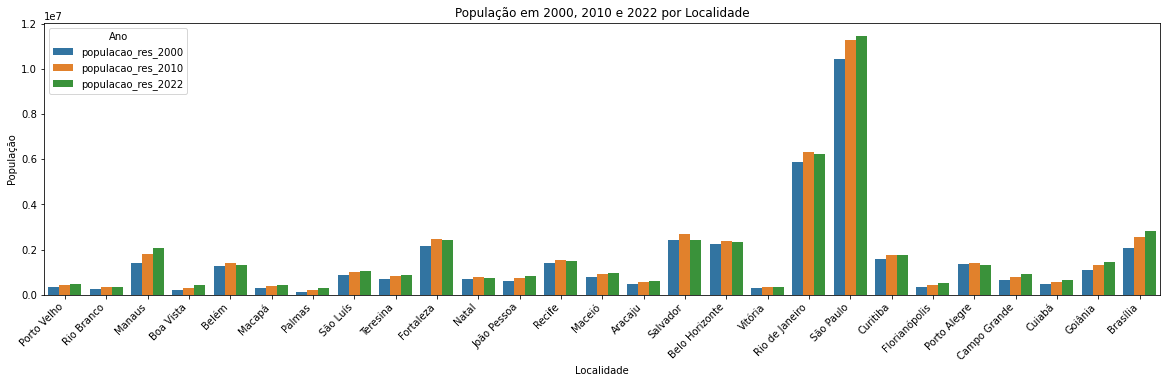

In [12]:
df_melted = pd.melt(df, id_vars=['localidade'], value_vars=['populacao_res_2000', 'populacao_res_2010', 'populacao_res_2022'], var_name='ano', value_name='populacao')

plt.figure(figsize=(20, 5))
sns.barplot(x='localidade', y='populacao', hue='ano', data=df_melted)

plt.title('População em 2000, 2010 e 2022 por Localidade')
plt.ylabel('População')
plt.xlabel('Localidade')  
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Ano', loc='upper left')  
plt.show()

Top 4 maiores densidades em 2022

In [13]:
df.nlargest(4, 'densidade_2022')

,localidade,area_km2,populacao_res_2000,populacao_res_2010,populacao_res_2022,densidade_2000,densidade_2010,densidade_2022
9,Fortaleza,312.353,2141402,2452185,2428708,6855.7,7850.7,7775.5
19,São Paulo,1521.202,10434252,11253503,11451999,6859.2,7397.8,7528.3
16,Belo Horizonte,331.354,2238526,2375151,2315560,6755.7,7168.0,6988.2
12,Recife,218.843,1422905,1537704,1488920,6501.9,7026.5,6803.6


Gráfico de barras empilhadas para verificar densidade em decorrer do tempo

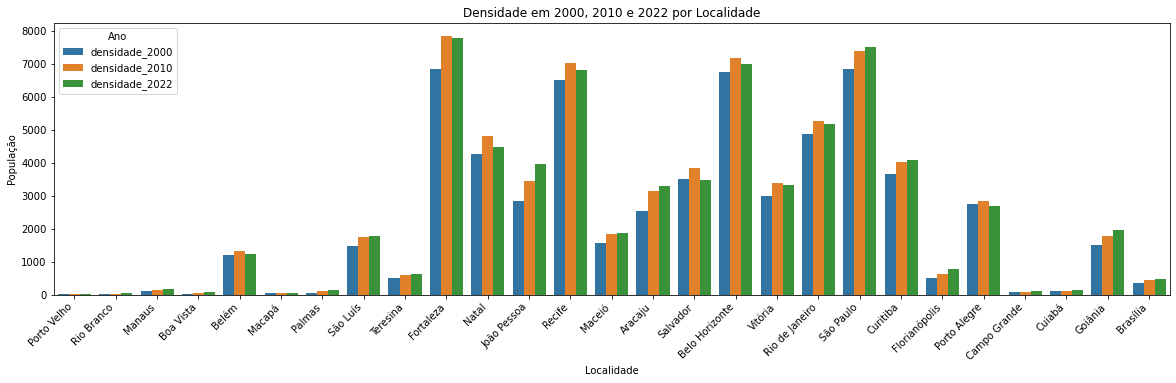

In [14]:
df_melted2 = pd.melt(df, id_vars=['localidade'], value_vars=['densidade_2000', 'densidade_2010', 'densidade_2022'], var_name='ano', value_name='densidade')

plt.figure(figsize=(20, 5))
sns.barplot(x='localidade', y='densidade', hue='ano', data=df_melted2)

plt.title('Densidade em 2000, 2010 e 2022 por Localidade')
plt.ylabel('População')
plt.xlabel('Localidade')  
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Ano', loc='upper left')  
plt.show()

Gráficos de dispersão para verificar relação de área km² e população

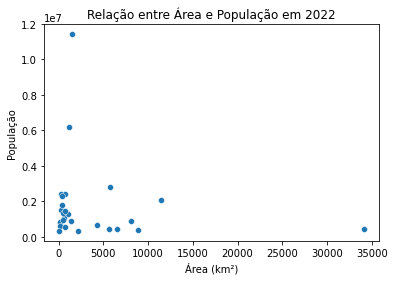

In [15]:
sns.scatterplot(x='area_km2', y='populacao_res_2022', data=df)
plt.title('Relação entre Área e População em 2022')
plt.ylabel('População')
plt.xlabel('Área (km²)')
plt.show()

Gráficos de dispersão para verificar relação de área km² e densidade

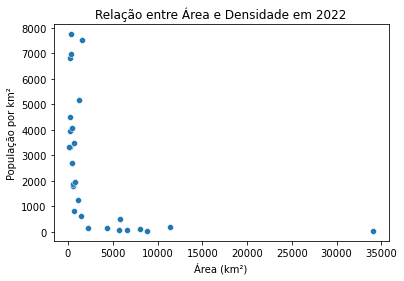

In [16]:
sns.scatterplot(x='area_km2', y='densidade_2022', data=df)
plt.title('Relação entre Área e Densidade em 2022')
plt.ylabel('População por km²')
plt.xlabel('Área (km²)')
plt.show()

Salvando os dados em um arquivo .csv

In [17]:
df.to_csv('dados_demograficos.csv', sep=';', index=False, encoding='utf-8')